# 2.1 Imports

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load train data
train = pd.read_csv('data/train_cleaned.csv',skipinitialspace=True)

In [4]:
# load test data
test = pd.read_csv('data/test_cleaned.csv',skipinitialspace=True)

In [5]:
train.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
test.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
16276,39.0,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64.0,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44.0,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16280,35.0,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [9]:
train.shape

(32561, 13)

In [10]:
test.shape

(16281, 13)

In [12]:
# temp: for deployment

list(train.education.unique())

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

# 2.2 Data Encoding

# 2.2.1 'education'

In [11]:
train['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [12]:
len(train['education'].value_counts())

16

In [13]:
test['education'].value_counts()

HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: education, dtype: int64

In [14]:
len(test['education'].value_counts())

16

In [15]:
test.education.dtype

dtype('O')

In [16]:
# create function
# ordinal encoder

def educ_encoder(x):
    if x in ['Doctorate']:
        return 4
    elif x in ['Masters', 'Prof-school']:
        return 3
    elif x in ['Bachelors']:
        return 2
    elif x in ['Some-college', 'Assoc-voc', 'Assoc-acdm']:
        return 1
    else:
        return 0

In [17]:
# merging education level according education ladder in us

train['education'] = train['education'].apply(educ_encoder)
test['education'] = test['education'].apply(educ_encoder)

In [18]:
train['education'].value_counts()

0    14754
1     9740
2     5355
3     2299
4      413
Name: education, dtype: int64

In [19]:
test['education'].value_counts()

0    7438
1    4800
2    2670
3    1192
4     181
Name: education, dtype: int64

# 2.2.2 'capital_gain' and 'capital_loss'

In [20]:
# create function
# combine 'capital_gain' and 'capital_loss'

def capital_change(row):
    return row['capital_gain'] - row['capital_loss']

In [21]:
# combine two related features

train['capital_gain'] = train.apply(lambda row: capital_change(row), axis = 1)
test['capital_gain'] = test.apply(lambda row: capital_change(row), axis = 1)

In [22]:
# change column name to 'capital_change'
# remove 'capital_loss'

train.rename(columns={'capital_gain':'capital_change'}, inplace=True)
train.drop(columns=['capital_loss'], inplace=True)

test.rename(columns={'capital_gain':'capital_change'}, inplace=True)
test.drop(columns=['capital_loss'], inplace=True)

In [23]:
train.describe()

,age,education,capital_change,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.890605,990.345014,40.437456
std,13.640433,1.001110,7408.986951,12.347429
min,17.000000,0.000000,-4356.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,1.000000,0.000000,40.000000
75%,48.000000,1.000000,0.000000,45.000000
max,90.000000,4.000000,99999.000000,99.000000


In [24]:
test.describe()

,age,education,capital_change,hours_per_week
count,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,0.886923,994.005835,40.392236
std,13.849187,1.000517,7607.153716,12.479332
min,17.000000,0.000000,-3770.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,1.000000,0.000000,40.000000
75%,48.000000,1.000000,0.000000,45.000000
max,90.000000,4.000000,99999.000000,99.000000


In [25]:
# observe target distribution
train['target'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

In [26]:
# target distribution:
# less than/ equal to 50K: ~75%
# more than 50K: ~25%

In [27]:
# observe 'capital_change' distribution in intervals

capital_range = [
    [-50000,0],
    [0,0],
    [0,50000],
    [50000,50000],
    [50000,99999],
    [99999,99999]
]

for range in capital_range:
    if range[0] == range[1]:
        # observe no of row in this range
        print(f'number of capital_change is {range[0]}:')
        x = train[train['capital_change'] == range[0]]
        print(x.count()[0])
        
        # observe this group's target distribution
        print(f"this group's target distribution:")
        print(x['target'].value_counts(normalize=True))
        print('\n')
    else:
        # observe no of row in this range
        print(f'number of capital_change between {range[0]} and {range[1]}:')
        x = train[(train['capital_change'] > range[0]) & (train['capital_change'] < range[1])]
        print(x.count()[0])
        
        # observe this group's target distribution
        print(f"this group's target distribution:")
        print(x['target'].value_counts(normalize=True))
        print('\n')

number of capital_change between -50000 and 0:
1519
this group's target distribution:
>50K     0.508887
<=50K    0.491113
Name: target, dtype: float64


number of capital_change is 0:
28330
this group's target distribution:
<=50K    0.809707
>50K     0.190293
Name: target, dtype: float64


number of capital_change between 0 and 50000:
2553
this group's target distribution:
>50K     0.594595
<=50K    0.405405
Name: target, dtype: float64


number of capital_change is 50000:
0
this group's target distribution:
Series([], Name: target, dtype: float64)


number of capital_change between 50000 and 99999:
0
this group's target distribution:
Series([], Name: target, dtype: float64)


number of capital_change is 99999:
159
this group's target distribution:
>50K    1.0
Name: target, dtype: float64




In [28]:
# most data are with zero capital gain
# all values over 99999 were presented as 99999

In [29]:
# create function
# ordinal encoder

def capital_encoder(x):
    if (x > -50000) and (x < 0):
        return 'between -50K and 0'
    elif x == 0:
        return 'equal to 0'
    elif (x > 0) and (x <= 50000):
        return 'between 0 and 50K'
    elif (x > 50000) and (x < 99999):
        return 'between 0 and 50K'
    elif x == 99999:
        return 'equal to 99999'

In [30]:
train['capital_change'] = train['capital_change'].apply(capital_encoder)
test['capital_change'] = test['capital_change'].apply(capital_encoder)

In [31]:
train['capital_change'].value_counts()

equal to 0            28330
between 0 and 50K      2553
between -50K and 0     1519
equal to 99999          159
Name: capital_change, dtype: int64

In [32]:
test['capital_change'].value_counts()

equal to 0            14195
between 0 and 50K      1238
between -50K and 0      763
equal to 99999           85
Name: capital_change, dtype: int64

# 2.3 Convert Target into Binary Values

In [33]:
train.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

In [34]:
test.target.value_counts()

<=50K.    12435
>50K.      3846
Name: target, dtype: int64

In [35]:
# train and test data have different formats

train['target'] = train['target'].map({
    '<=50K': 0,
    '>50K': 1
})

test['target'] = test['target'].map({
    '<=50K.': 0,
    '>50K.': 1
})

In [36]:
train['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [37]:
test['target'].value_counts()

0    12435
1     3846
Name: target, dtype: int64

# 2.4 Handle Outliers

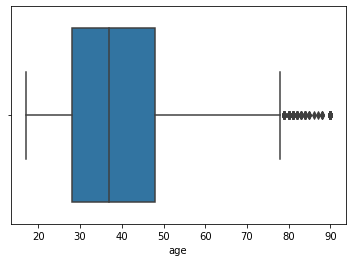

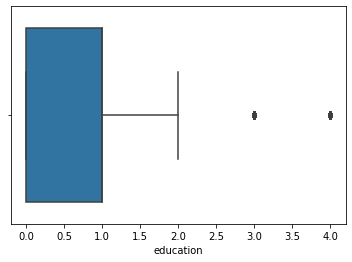

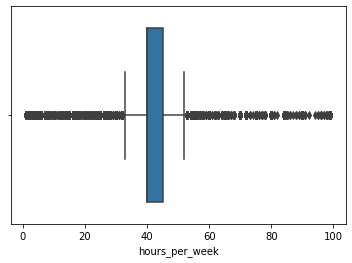

In [38]:
# observe outliers

features = ['age','education','hours_per_week']

for feature in features:
    sns.boxplot(train[feature])
    plt.show()

In [39]:
train.shape

(32561, 12)

In [40]:
test.shape

(16281, 12)

In [41]:
# for 'age'
# considering the average age of population
# it is fair to remove data with over 80 years old

age_filter = (train['age'] <= 80)
train = train[age_filter]

age_filter = (test['age'] <= 80)
test = test[age_filter]

In [42]:
train.shape

(32462, 12)

In [43]:
test.shape

(16232, 12)

In [44]:
# for 'hours_per_week'
# we know that specific job types have extreme short/ long working hours
# therefore we will keep all data

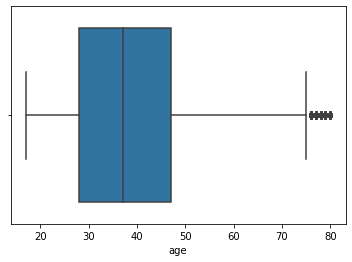

In [45]:
# 'age' after outliers removal

features = ['age']

for feature in features:
    sns.boxplot(train[feature])
    plt.show()

# 2.5 Save Preprocessed Data

In [46]:
train.to_csv('data/train_prep_1.csv',index=False)

In [47]:
test.to_csv('data/test_prep_1.csv',index=False)

In [48]:
# END